In [87]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier

from util.eval_model import plot_eval_metrics

warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

sns.set_style('darkgrid')


In [2]:
digits = datasets.load_digits()

X = pd.DataFrame(data=digits.data)
y = pd.DataFrame(data=digits.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


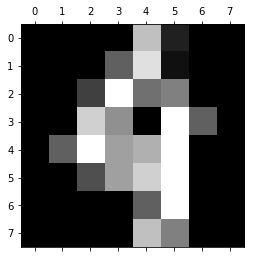

In [20]:
plt.gray()
plt.matshow(digits.images[24])

In [89]:
pipeline = Pipeline([
    ('clf', DecisionTreeClassifier())
])

parameters = [
    {
        'clf': [DecisionTreeClassifier()],
        'clf__max_depth': [3, 4, 5, 6],
        'clf__min_samples_split': [2, 10, 50, 100]
    },
    {
        'clf': [RandomForestClassifier()],
        'clf__n_estimators': [10, 20, 30],
    },
    {
        'clf': [AdaBoostClassifier()],
        'clf__n_estimators': [10, 20, 30],
    }
]

grid = GridSearchCV(pipeline, param_grid=parameters, n_jobs=-1, cv=10)
grid.fit(X_train, y_train.values.ravel())
print(grid.best_score_)
print(grid.best_params_)
print(grid.score(X_test, y_test))



0.958437240233
{'clf': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'clf__n_estimators': 30}
0.968013468013


{'clf__n_estimators': 50, 'select__k': 53, 'select__score_func': <function chi2 at 0x000000000CC78B70>}
Best Score: 0.9742310889443059, 
Test Score: 0.9713804713804713


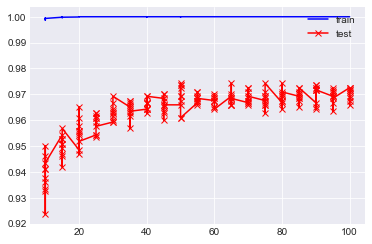

In [84]:
pipeline = Pipeline([
    ('select', SelectKBest()),
    ('clf', RandomForestClassifier())
])

parameters = {
    'select__k': np.arange(45, 55),
    'select__score_func': [chi2],
    'clf__n_estimators': np.arange(10, 101, 5)
}

grid = GridSearchCV(pipeline, param_grid=parameters, n_jobs=-1, cv=10)
grid.fit(X_train, y_train.values.ravel())

test_score = grid.score(X_test, y_test)
print(grid.best_params_)
print(f'Best Score: {grid.best_score_}, \nTest Score: {test_score}')

mean_train_score = grid.cv_results_['mean_train_score']
mean_test_score = grid.cv_results_['mean_test_score']
num_estimators = grid.cv_results_['param_clf__n_estimators']
num_features = grid.cv_results_['param_select__k']

plt.plot(num_estimators, mean_train_score, color='blue', label='train')
plt.plot(num_estimators, mean_test_score, color='red', marker='x', label='test')
plt.legend(loc='upper right')

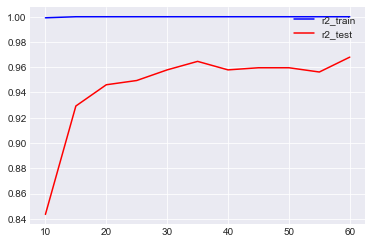

In [85]:
result = {
        'r2_train': [],
        'r2_test': [],
    }

num_features = np.arange(10, 65, 5)

for i in num_features:
    clf = make_pipeline(SelectKBest(k=i, score_func=chi2), RandomForestClassifier(n_estimators=20))
    clf.fit(X_train, y_train.values.ravel())
    result['r2_train'].append(clf.score(X_train, y_train.values.ravel()))
    result['r2_test'].append(clf.score(X_test, y_test.values.ravel()))
    
p1 = plt.plot(num_features, result['r2_train'], color='blue', label='r2_train')
p2 = plt.plot(num_features, result['r2_test'], color='red', label='r2_test')
plt.legend(loc='upper right')
